In [42]:
def helper():
    import matplotlib.pyplot as plt
    import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


In [43]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import torch
import numpy as np
import matplotlib.pyplot as plt

In [44]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
                               ])

trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

We have the training data loaded into trainloader and we make that an iterator with iter(trainloader). Later, we'll use this to loop through the dataset for training. 

In [54]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


This is what one of the images looks like.

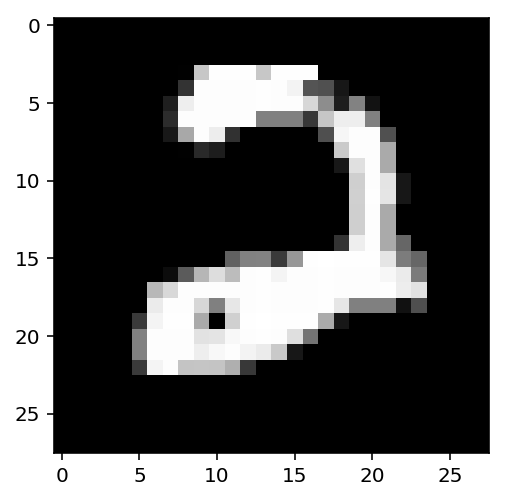

In [55]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [56]:
def activation(x):
    return 1/(1+torch.exp(-x))

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784,256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = torch.mm(h, w2) + b2
print(out)

tensor([[ -3.3481,  18.4494, -16.2995, -16.5603,  -2.3734, -12.4608,
          -4.1734,  -0.2872,   8.1812,  13.9317],
        [ -9.0116,  16.1485, -22.5720, -17.8771, -19.9603, -15.1346,
          -6.6726,   3.8441,   7.0411,  13.6898],
        [ -7.5456,  30.0630,  -4.1169, -15.4106, -12.7016,   0.5775,
          -3.7936,  -8.7371,  12.3665,  18.9143],
        [ -2.4655,  29.1810, -18.2723, -16.7964, -20.7926, -10.2649,
          -1.7228,  -8.0121,  11.9049,  23.2795],
        [ -5.2382,  18.5773, -17.6020, -22.4331,  -9.5034,  -1.9006,
           2.8137,  -9.1911,   3.5055,  22.0528],
        [  0.3136,  22.1985,  -3.2454, -12.0539, -11.0646,  -6.5182,
          -5.9252,  -1.3457,  14.9390,  14.3300],
        [-10.4697,  18.3660,  -0.2396, -14.0339, -11.3451,  -9.2250,
          -4.1637,   1.5432,  10.6387,  20.5389],
        [ -1.7311,  21.4162,  -8.9294, -17.5655,  -9.0819,  -9.8682,
          -5.0230,  -2.7184,  11.1482,  24.8325],
        [-14.4791,  25.3463, -13.8253, -14.2774,

In [57]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1,1)
                                  
probabilities = softmax(out)
                                  
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([ 1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000])


#### Buildung Networks with PyTorch:

In [58]:
from torch import nn
import torch.nn.functional as F

In [59]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1=nn.Linear(784,128)
        self.fc2=nn.Linear(128,64)
        self.fc3=nn.Linear(64,10)
        
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x
    
model = Network()
model
        

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

#### Forward Pass: 

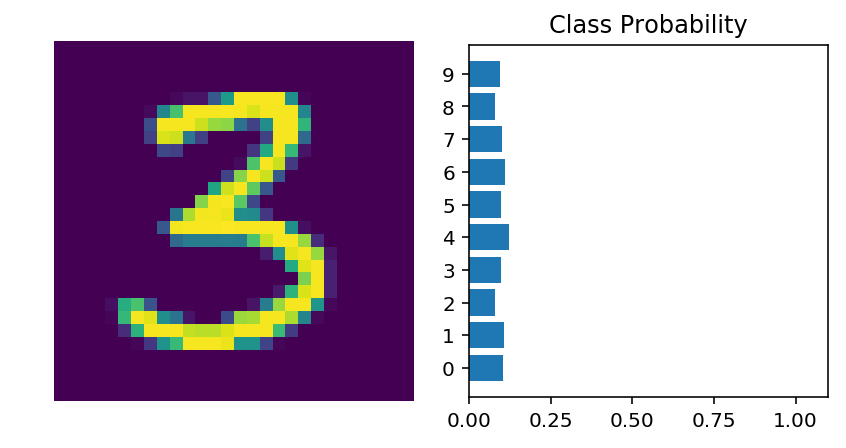

In [63]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

images.resize_(64, 1, 784)

img_idx = 0
ps = model.forward(images[img_idx, :1])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

As we can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random.|

In [69]:
# Building a feed forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

print(loss)

tensor(2.3265)


In [70]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor(1.00000e-02 *
       [[ 0.0352,  0.0352,  0.0352,  ...,  0.0352,  0.0352,  0.0352],
        [-0.0762, -0.0762, -0.0762,  ..., -0.0762, -0.0762, -0.0762],
        [-0.1086, -0.1086, -0.1086,  ..., -0.1086, -0.1086, -0.1086],
        ...,
        [-0.0237, -0.0237, -0.0237,  ..., -0.0237, -0.0237, -0.0237],
        [-0.0987, -0.0987, -0.0987,  ..., -0.0987, -0.0987, -0.0987],
        [-0.2061, -0.2061, -0.2061,  ..., -0.2061, -0.2061, -0.2061]])
